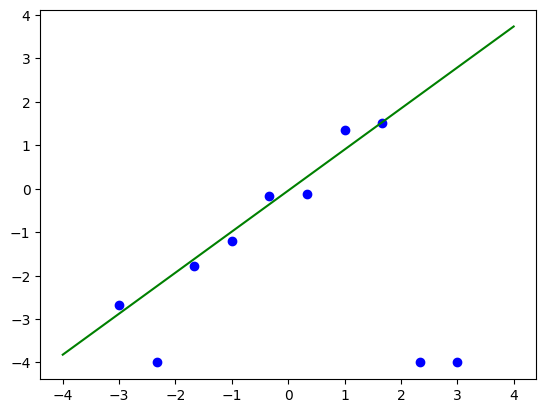

In [4]:
from __future__ import division
from __future__ import print_function

import numpy as np
import matplotlib

#matplotlib.use('TkAgg')
import matplotlib.pyplot as plt

np.random.seed(1)  # set the random seed for reproducibility


def generate_sample(xmin=-3., xmax=3., sample_size=10):
    x = np.linspace(start=xmin, stop=xmax, num=sample_size)
    y = x + np.random.normal(loc=0, scale=.2, size=sample_size)
    y[-1] = y[-2] = y[1] = -4
    return x, y

def calc_design_matrix(x):
    phi = np.empty(x.shape + (2,))
    phi[:, 0] = 1.
    phi[:, 1] = x
    return phi

def IRLS_Tukey(x, y, eta=1., max_iter=1000, tol=1e-4):
    phi = calc_design_matrix(x)
    # Initialize theta by regularized ridge regression
    n = phi.shape[1]
    theta = theta_prev = np.linalg.solve(phi.T.dot(phi) + 1e-4 * np.identity(n), phi.T.dot(y))
    
    # Iteratively update theta until convergence
    for _ in range(max_iter):
        # Update theta
        r = np.abs(phi.dot(theta_prev) - y)
        w = np.diag(np.where(r > eta, 0, (1 - r*r/(eta*eta))**2))
        phit_w_phi = phi.T.dot(w).dot(phi)
        phit_w_y = phi.T.dot(w).dot(y)
        theta = np.linalg.solve(phit_w_phi, phit_w_y)

        # Check for convergence
        if np.linalg.norm(theta - theta_prev) < tol:
            break

        theta_prev = theta
    return theta


def predict(x, theta):    
  phi = calc_design_matrix(x)    
  return phi.dot(theta) 

def visualize(x, y, theta, x_min=-4., x_max=4., filename='xxxxxx.png'):    
  X = np.linspace(x_min, x_max, 1000)    
  Y = predict(X, theta)    
  plt.clf()    
  plt.plot(X, Y, color='green')    
  plt.scatter(x, y, c='blue', marker='o')    
  plt.savefig('ADA3-3.png')


# create sample
x, y = generate_sample()

# solve the least square problem by IRLS
theta = IRLS_Tukey(x, y, eta=1.)

# visualize
visualize(x, y, theta)